# Demonstration of preprocessing tools implemented in the openhytest

Copyright 2019 - Openhytest Developer


This jupiter notebook is saved in a subfolder such that we set the right path without creating any error messages. We will append the folder above using the sys library.

In addition we load the pandas library, which is used for data management, analysis and visualisation in the openhytest package. The matplotlib.pyplot is loaded for first visualisation of the raw data in this notebook. 


In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import openhytest as ht
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6) # set default size of plots
plt.rcParams.update({'font.size': 22})

## Load the data

The pandas package allow to load the raw data from many different input files (i.e. csv, excel, json, html, hdf, sql, gbq, stata more in the documentation of https://pandas.pydata.org/ ). A few things are important to know, prior to the use of openhytest. The data are loaded using the command read_csv with space separation. This creates a DataFrame  with the name data. A naming is not only recommended for the usage, it allows also direct labeling in figures and easy data accessability. It is also directly used by the openhytest package and for some functions compulsory.
The type of data format is recommended, such that float number are desired explicit.

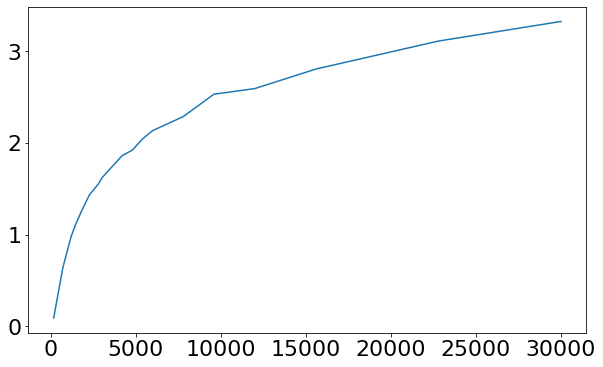

In [2]:
name = ["t","s"]
dtypes = {'t': 'float', 's': 'float'}
data = pd.read_csv('../data/ths_ds1.txt', sep=" ", header = None, names=name, dtype=dtypes)
plt.plot(data.t,data.s)

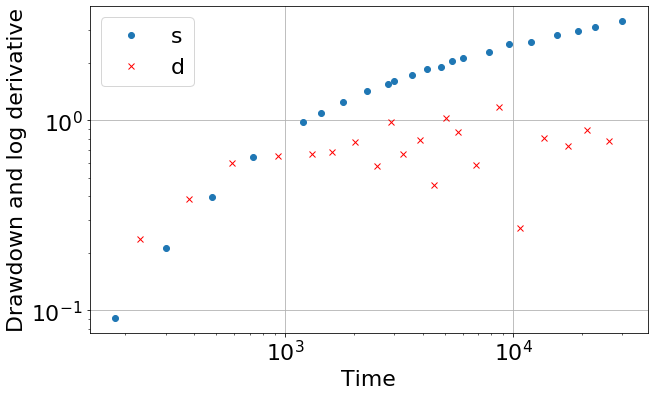

In [3]:
test = ht.preprocessing(data)
test.ldiff_plot()

In [4]:
test.ldiffs()

,t,s
0,214.727654,0.229797
1,256.155363,0.275977
2,305.575779,0.328335
3,364.530945,0.385790
4,434.860415,0.446316
5,518.758648,0.507116
6,618.843486,0.565238
7,738.237833,0.617955
8,880.667100,0.661794
9,1050.575446,0.692113


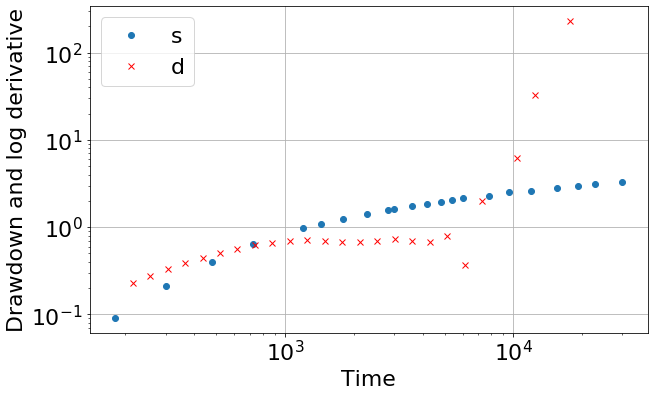

In [5]:
test.ldiffs_plot()

ht.ldiffs_plot(data)

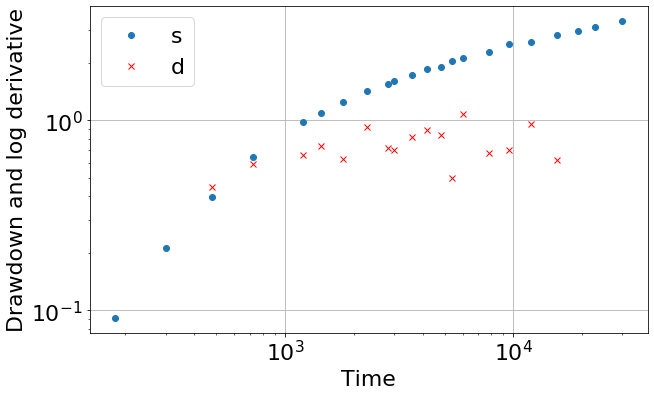

In [6]:
test.ldiffb_plot()

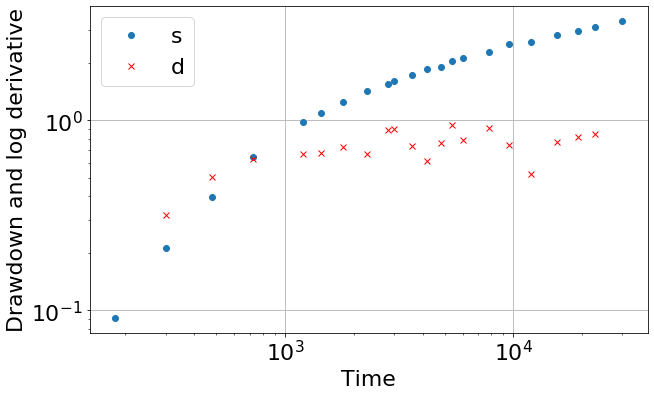

In [7]:
test.ldiffh_plot()

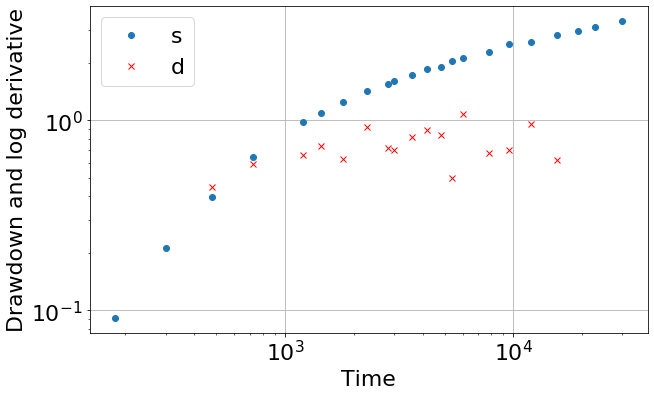

In [8]:
test.diagnostic(method='bourdet')

# Hyclean 

Gives back the data set with only values that are not nan, finite and strictly positive time.
Therefore, we will first add a negative entry and an inf entry.

In [8]:
data['s'][2] = -.1
data['s'][19] = np.inf
print(data)

          t        s
0     180.0  0.09144
1     300.0  0.21336
2     480.0 -0.10000
3     720.0  0.64008
4    1200.0  0.97536
5    1440.0  1.09728
6    1800.0  1.24968
7    2280.0  1.43256
8    2820.0  1.55448
9    3000.0  1.61544
10   3600.0  1.73736
11   4200.0  1.85928
12   4800.0  1.92024
13   5400.0  2.04216
14   6000.0  2.13360
15   7800.0  2.28600
16   9600.0  2.52984
17  12000.0  2.59080
18  15600.0  2.80416
19  19200.0      inf
20  22800.0  3.10896
21  30000.0  3.32232


In [9]:
cleandata = ht.preprocessing(data)
data = cleandata.hyclean()
print(cleandata.data)

          t        s
0     180.0  0.09144
1     300.0  0.21336
3     720.0  0.64008
4    1200.0  0.97536
5    1440.0  1.09728
6    1800.0  1.24968
7    2280.0  1.43256
8    2820.0  1.55448
9    3000.0  1.61544
10   3600.0  1.73736
11   4200.0  1.85928
12   4800.0  1.92024
13   5400.0  2.04216
14   6000.0  2.13360
15   7800.0  2.28600
16   9600.0  2.52984
17  12000.0  2.59080
18  15600.0  2.80416
20  22800.0  3.10896
21  30000.0  3.32232


# Hyselect

Select a time period from the data set, which will be saved and used for further analysation.

In [12]:
cleandata.hyselect(xstart = 1700.0, xend = 10000.0)
print(cleandata.data)

         t        s
6   1800.0  1.24968
7   2280.0  1.43256
8   2820.0  1.55448
9   3000.0  1.61544
10  3600.0  1.73736
11  4200.0  1.85928
12  4800.0  1.92024
13  5400.0  2.04216
14  6000.0  2.13360
15  7800.0  2.28600
16  9600.0  2.52984


# Hyfilter

Check if it works

# Hysampling